In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("CarPrice - CarPrice.csv")
df


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
# Converting categorical variables to numerical using encoding
categorical_cols = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 
                    'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,False,False,False,False,False,False,False,True,False,False
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,False,False,False,False,False,False,False,True,False,False
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,False,False,False,False,False,False,False,True,False,False
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,False,False,False,False,False,False,False,True,False,False
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,False,False,False,False,False,True,False,False,False,False


In [6]:
# Checking correlation
correlation_matrix = df.corr()
correlation_matrix

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,...,-0.099382,-0.062705,-0.108464,-0.085037,-0.094729,0.125568,-0.086367,0.186275,-0.037015,-0.066254
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,...,0.065707,-0.047012,0.245950,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,...,-0.120709,0.037803,-0.081174,-0.396505,-0.070124,0.308346,-0.033294,0.348891,-0.117359,-0.032129
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,...,-0.187445,0.100413,-0.057877,-0.487237,-0.049998,0.212679,-0.004831,0.511374,-0.079790,-0.008245
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,...,-0.183473,0.153516,-0.013699,-0.522594,-0.011834,0.233880,0.012832,0.461896,-0.046399,-0.023158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fuelsystem_idi,0.125568,-0.194311,0.308346,0.212679,0.233880,0.284631,0.217275,0.069594,0.054451,0.241829,...,-0.023020,-0.023020,-0.046383,-0.226565,-0.040070,1.000000,-0.023020,-0.302574,-0.070457,-0.023020
fuelsystem_mfi,-0.086367,0.122067,-0.033294,-0.004831,0.012832,-0.101245,0.034431,0.049033,0.070030,0.144263,...,-0.004902,-0.004902,-0.009877,-0.048245,-0.008532,-0.023020,1.000000,-0.064430,-0.015003,-0.004902
fuelsystem_mpfi,0.186275,0.012532,0.348891,0.511374,0.461896,0.108685,0.520220,0.483520,0.419335,-0.110280,...,-0.064430,0.076082,-0.059039,-0.634114,-0.112147,-0.302574,-0.064430,1.000000,-0.197195,-0.064430
fuelsystem_spdi,-0.037015,0.181939,-0.117359,-0.079790,-0.046399,-0.278615,-0.002434,0.004490,-0.004213,0.251259,...,-0.015003,-0.015003,-0.030229,-0.147658,-0.026114,-0.070457,-0.015003,-0.197195,1.000000,-0.015003


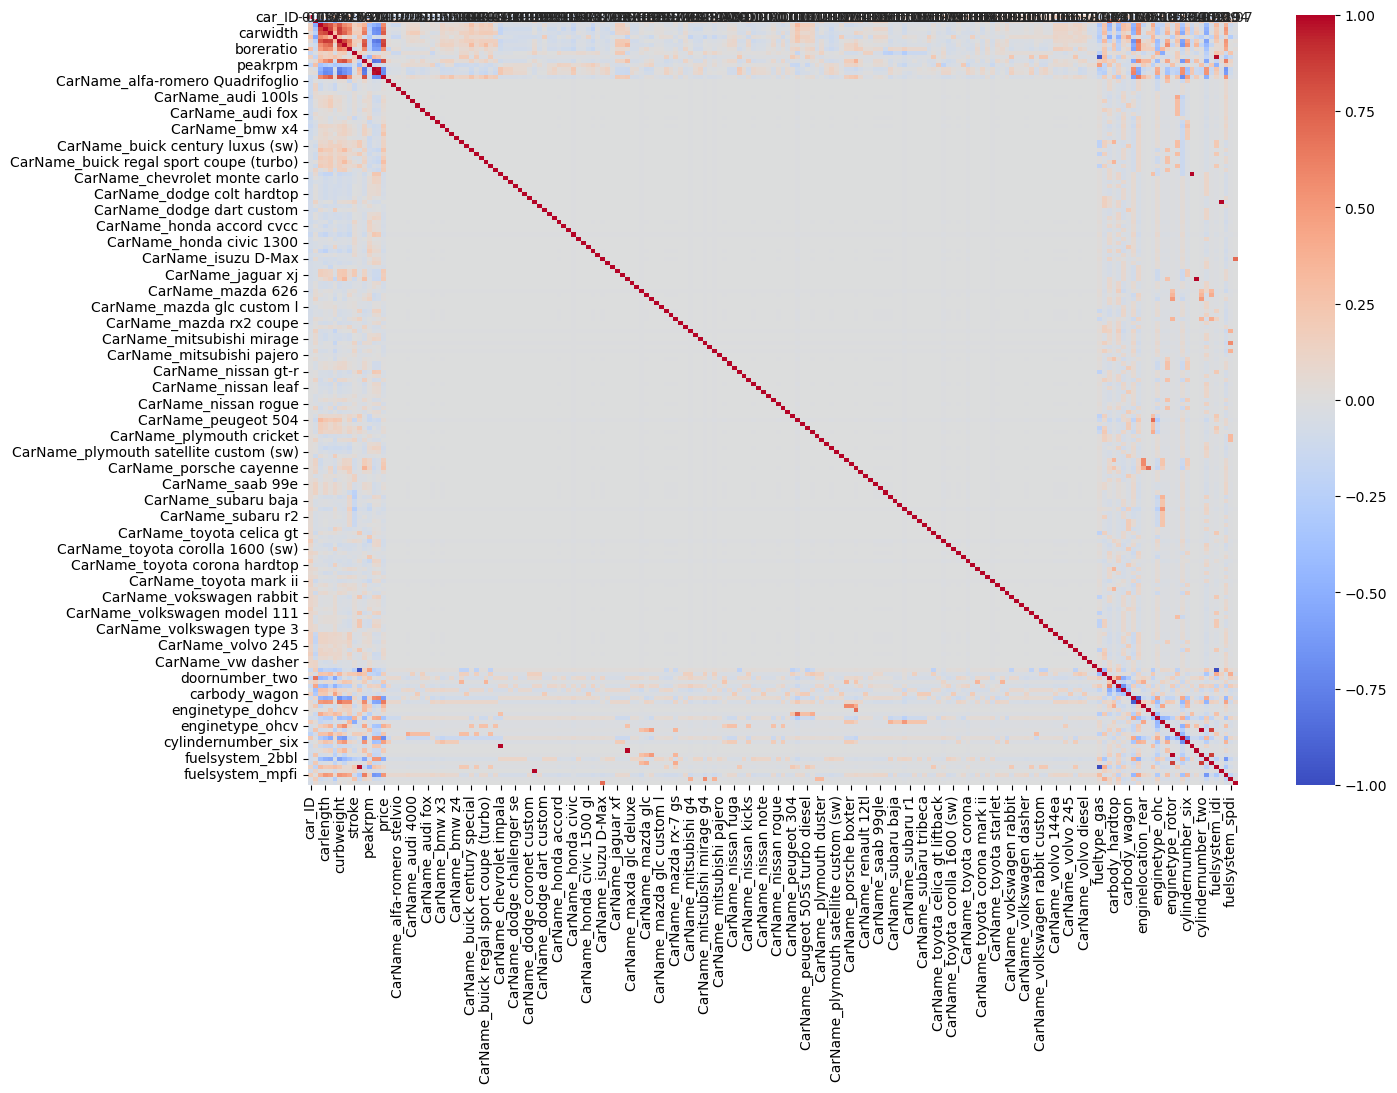

In [10]:
# Checking correlation with the target variable 'price'
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [11]:
# Model Training
X = df.drop(['price', 'car_ID'], axis=1)
y = df['price']


In [12]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Trainng a multiple linear regression model
multiple_regression_model = LinearRegression()
multiple_regression_model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Predictions
y_pred = multiple_regression_model.predict(X_test)
y_pred

array([13907.57151607, 20592.93292802, 13012.62517672,  7686.26414982,
       27128.65418377,  6820.11772042,  8821.01991395,  9198.0902386 ,
       15336.5990122 , 12531.69557784, 14375.92447689,  4441.31711079,
       15463.4429998 ,  8329.5010725 , 38257.32525242,  8498.79596863,
       -8895.02065627, 13186.01125744, 17753.15760612, 16139.14886092,
       13963.33631573, 16956.56193395, 12008.67593273,  4543.92766935,
       15775.99910526, 15072.93799908, 12646.85564228, 12994.88693282,
        7264.56979385, 11184.22135752, 26021.45671429,  8687.31218949,
        7519.47901989, 17997.67084223,  4372.41559889, 27426.01475529,
       17777.61673208, 13296.58736957, 12282.3583352 , 16991.07049045,
       12556.43390242])

In [17]:
# Evaluation
r2 = r2_score(y_test, y_pred)
r2


0.4737153315753221

In [18]:
mae = mean_absolute_error(y_test, y_pred)
mae

4177.2956313499635

In [19]:
mse = mean_squared_error(y_test, y_pred)
mse

41547027.85276149

In [21]:
## plt.scatter(X_test, y_test)
## plt.plot(X_test, y_pred, c='r')